<center>
<img src='https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExMDBjNTczYzE0NTIxMjlmYjg1OGQwN2UxYzk4M2VlYzRlYTUzNjlkMyZlcD12MV9pbnRlcm5hbF9naWZzX2dpZklkJmN0PWc/8qGPuB8AQW3AZuXVSb/giphy.gif' align='center' width="500x">
</center>

###**Тема проекта**
Венчурные инвестиции в криптопроекты за период с 1 января 2021 года - до 1 января 2023 года

\

---
\

**Источник:** https://cryptorank.io/funding-rounds

> Один из самых авторитетных источников, предоставляющий данные и аналитику о цифровых активах. Для сбора информации cryptorank использует первоначальные и проверенные источники, включая биржи криптовалют, официальные сайты компаний, новостные ресурсы, пресс-релизы, социальные сети проектов и другие источники, чтобы собирать информацию о финансировании проектов.




In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import urllib.request
import requests
from bs4 import BeautifulSoup
from typing import  List
import seaborn as sns
from string import punctuation
import math

#Первоначальный сбор данных

Был выполнен парсинг источника проекта, отфильтрованного по дате за период с 1 января 2021 года - до 1 января 2023 года

\

---


**Шаг 1**

Мы нашли в коде сайта местоположения таблиц

> Так как outerHTML таблиц большие и по размеру, и по весу - мы сохранили ссылки на страницы, как текстовый файл и перенесли в Google Disk для их открытия



In [ ]:
url = "https://drive.google.com/uc?id=1PrjmYUWyA0ncWkkwn_7Girj4OJgjtXId"
with urllib.request.urlopen(url) as response:
    html = response.read().decode()
html = html.split("\n")

**Шаг 2**

Далее мы запарсили таблицы с помощью BeautifulSoup, который находит тег table - элемент, где как раз хранятся наши данные

Нашли все строки и вытащили из каждой информацию про инвестиции в определенный проект

Полученные данные сохранили в df для будущего анализа

In [ ]:
df = []
for i in range(len(html)-1):
    beautiful_soup = BeautifulSoup(html[i], 'html.parser')
    table = beautiful_soup.find('table')
    rows = table.find_all('tr')

    for row in rows:
        cols = row.find_all('td')
        cols = [col.text.strip() for col in cols]
        df.append(cols)

**Шаг 3**

Переформатировали запарсенные данные df в формат pandas и озаглавили столбцы соответственно для более удобного последующего анализа и моделирования

In [ ]:
funding_rounds = pd.DataFrame(df, columns = ['Project', 'Date', 'Raise', 'Stage', 'Funds and investors', 'Category'])

print(funding_rounds.shape)
funding_rounds.head()

(3742, 6)


,Project,Date,Raise,Stage,Funds and investors,Category
0,None,None,None,None,None,None
1,DeSchool,31 Dec 2022,,Seed,y2z Ventures +5,Blockchain Service
2,Magic Fantasy,30 Dec 2022,"$ 3,000,000",Unknown,Easycoins,GameFi
3,Twity,29 Dec 2022,"$ 6,500,000",Series A,Wave Capital,Social
4,wowTalkies,29 Dec 2022,,Unknown,Tangentia Ventures,Social




---

\
**Информация о полученных данных (по столбцам):**

1.    Project - название проекта (стартапа) в Web3, который находится на стадии рейза
2.    Date - дата фандрейза проекта
3.    Raise - сумма финансирования (cумма, которую стартап собрал от инвесторов и/или венчурных фондов, $)
4.    Stage - раунд/стадия развития стартапа, на которую приходится венчурное финансирование
5.    Funds and investors - инвесторы и/или венчурные фонды в проект (ведущий инвестор представленного раунда  + количество других инвесторов проекта)
6.    Category - отрасль, тематика проекта


# Предварительная обработка

Была выполнена первоначальная обработка собранной информации: форматирование данных, заполнение пустых значений, нахождение и корректировка выбросов

\

---


**Шаг 1**

Преобразуем пустые значения в более привычный нам вид NaN

In [ ]:
funding_rounds = funding_rounds.dropna(how='all').replace('', np.nan)

**Шаг 2**

Поработаем над колонкой 'Funds and investors' - разделим ее на два новых столбца:


1.   Lead Investor - ведущий инвестор (инвестор, который чаще всего предоставляет наибольший объем финансирования, обычно он вносит первые инвестиции в стартап и принимает большое участие в будущем развитии проекта)
2.   Investors quantity - количество инвесторов (не включая лид - инвестора)



In [ ]:
funding_rounds[['Lead Investor', 'Investors quantity']] = funding_rounds['Funds and investors'].str.rsplit(' +', n=1, expand=True)
funding_rounds = funding_rounds.drop('Funds and investors', axis=1)

funding_rounds.head()

,Project,Date,Raise,Stage,Category,Lead Investor,Investors quantity
1,DeSchool,31 Dec 2022,NaN,Seed,Blockchain Service,y2z Ventures,5
2,Magic Fantasy,30 Dec 2022,"$ 3,000,000",Unknown,GameFi,Easycoins,None
3,Twity,29 Dec 2022,"$ 6,500,000",Series A,Social,Wave Capital,None
4,wowTalkies,29 Dec 2022,NaN,Unknown,Social,Tangentia Ventures,None
5,Argo Blockchain,28 Dec 2022,"$ 35,000,000",Debt Financing,Blockchain Service,Galaxy,None


In [ ]:
funding_rounds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3704 entries, 1 to 3741
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Project             3704 non-null   object
 1   Date                3704 non-null   object
 2   Raise               3244 non-null   object
 3   Stage               3704 non-null   object
 4   Category            3678 non-null   object
 5   Lead Investor       3494 non-null   object
 6   Investors quantity  2887 non-null   object
dtypes: object(7)
memory usage: 231.5+ KB


**Проанализировав информацию о данных, мы выявили несколько моментов, требующих обработки:**

1.   На данном этапе все данные имеют тип 'object', хотя у нас есть
количественные признаки и информация о дате

2.   Есть пропущенные значения:
*   *Столбец 2* - raise (460 пропущенных)
*   *Столбец 4* - category (26 пропущенных)
*   *Столбец 5* - lead investor (210 пропущенных)
*   *Столбец 6* - Investors quantity (817 пропущенных)

\

---


In [ ]:
funding_rounds.isna().sum()

Project                 0
Date                    0
Raise                 460
Stage                   0
Category               26
Lead Investor         210
Investors quantity    817
dtype: int64

**Шаг 3**

Привели значения 'Investors quantity' и 'Raise' к типу float (во втором случае еще удалили значок $ для форматирования)

Привели значения 'Date' к типу datetime

In [ ]:
funding_rounds['Investors quantity'] = pd.to_numeric(funding_rounds['Investors quantity'], errors='coerce')
funding_rounds['Raise'] = funding_rounds['Raise'].astype(str).str.replace(',', '', regex=True).str.replace('$', '', regex=True)
funding_rounds['Raise'] = funding_rounds['Raise'].astype(float)
funding_rounds['Date'] = pd.to_datetime(funding_rounds['Date'], format='%d %b %Y')

In [ ]:
funding_rounds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3704 entries, 1 to 3741
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Project             3704 non-null   object        
 1   Date                3704 non-null   datetime64[ns]
 2   Raise               3244 non-null   float64       
 3   Stage               3704 non-null   object        
 4   Category            3678 non-null   object        
 5   Lead Investor       3494 non-null   object        
 6   Investors quantity  2887 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 231.5+ KB



**Как заполняем пустые значения?**

>
> ---
> *Столбец 2* - Raise
>
> *Столбец 5* - Lead Investor
>
> ---
>
> 1) Если нет данных о рейзе, но есть инвесторы - выносим в отдельную таблицу и находим лучший способ заполнения пропусков
>
> 2) Если нет данных об инвесторах, но есть данные о рейзе - ставим вместо NaN: 'Private investor' + количество инвесторов 1
>
> 3) Если проект не поднял никаких инвестиций и нет данных ни об инвесторах, ни о рейзе, то ставим 0 в рейзе, No investors в Lead investor + в количество инвесторов 0
>
> ---
>
> *Столбец 6* - Investors quantity
>
> ---
>
> 1) К Investors quantity добавить 1 (это неучтенный лид инвестор)
>
> 2) Где NaN:
> - где-то должна быть 1, если есть лид инвестор
> - оставшиеся NaN, если его нет, заполняем: либо 1, как Private Investor (если есть рейз) , либо 0 (если нет рейза)
>
> ---
>
> *Столбец 4* - Category (≈ 30 пропущенных)
>
> ---
>
> Пустые значения вынесим в отдельную таблицу и заполним, анализируя проекты




**Шаг 4**

Добавили единицу к значениям столбца Investors quantity, поскольку в нём не учитывался ведущий инвестор (такова особенность данных)

In [ ]:
funding_rounds['Investors quantity'] = funding_rounds['Investors quantity'].add(1)

**Шаг 5**

Там где есть информация о лид инвесторе, но нет количества инвесторов, ставим единицу в Investors quantity



In [ ]:
funding_rounds.loc[
    funding_rounds['Lead Investor'].notnull() & funding_rounds['Investors quantity'].isnull(),
    'Investors quantity'
] = 1

**Шаг 6**

Там где нет информации о лид инвесторе, но есть информация о рейзе, ставим единицу в Investors quantity и 'Private investor' в столбце лид инвестора


> Мы сделали предположение, что, скорее всего, инвестиции осуществил какой-то частный инвестор, которого cryptorank не знает





In [ ]:
funding_rounds.loc[
    (funding_rounds['Lead Investor'].isna()) & (funding_rounds['Raise'].notna()),
    ['Lead Investor', 'Investors quantity']
] = ['Private investor', 1]


**Шаг 7**

Там где нет информации о лид инвесторе и нет информации о рейзе, ставим 0 в Investors quantity и 'No investors' в столбце лид инвестора, так как проект не поднял никаких инвестиций

In [ ]:
funding_rounds.loc[
    (funding_rounds['Lead Investor'].isna()) & (funding_rounds['Raise'].isna()),
    ['Lead Investor', 'Investors quantity', 'Raise']
] = ['No investors', 0, 0]

funding_rounds.head()

,Project,Date,Raise,Stage,Category,Lead Investor,Investors quantity
1,DeSchool,2022-12-31,NaN,Seed,Blockchain Service,y2z Ventures,6.000
2,Magic Fantasy,2022-12-30,3000000.000,Unknown,GameFi,Easycoins,1.000
3,Twity,2022-12-29,6500000.000,Series A,Social,Wave Capital,1.000
4,wowTalkies,2022-12-29,NaN,Unknown,Social,Tangentia Ventures,1.000
5,Argo Blockchain,2022-12-28,35000000.000,Debt Financing,Blockchain Service,Galaxy,1.000


**Шаг 8**

Мы решили, что заполнять оставшиеся пропуски в столбце Raise стоит, учитывая все три критерия


> *Логика:*
>
> Мы видим, что Raise неизвестен, но зато мы знаем три самых важных признака проекта (стадию, категорию и количество инвесторов), запоминаем их и ищём во всей таблице аналогичные случаи, но те, у которых Raise известен. По всем нашедшим данным нашли среднее значение и заполнили искомый Raise:)

\

> *Замечание*:
>
> Поиск среднего даёт нам число, которое совсем не похоже на реальный рэйз. Вряд ли кто-то будет инвестировать в проект странную сумму, например, 3872691823.4832! Этот факт подтверждают прочие суммы рэйзов в таблице - все они ровные, без "копеек". Именно поэтому мы приняли решение округлить среднее до миллионов.






In [ ]:
missing_raise = funding_rounds[funding_rounds['Raise'].isna()]    # находим, где неизвестен Raise

for index, row in missing_raise.iterrows():
    inv_qty = row['Investors quantity']
    category = row['Category']
    stage = row['Stage']

    # фильтруем таблицу, оставляя только известные Raise с таким же количеством инвесторов, категорией и стадией
    known_raise = funding_rounds[
        (funding_rounds['Raise'].notna()) &
        (funding_rounds['Investors quantity'] == inv_qty) &
        (funding_rounds['Category'] == category) &
        (funding_rounds['Stage'] == stage)
    ]

    if not known_raise.empty:
        avg_raise = known_raise['Raise'].mean()
        avg_raise = round(avg_raise / 1000000) * 1000000    # округляем до миллионов
    else:
        avg_raise = np.nan

    funding_rounds.at[index, 'Raise'] = avg_raise    # заполняем пропуск средним значением


In [ ]:
funding_rounds.isna().sum()

Project                0
Date                   0
Raise                 42
Stage                  0
Category              26
Lead Investor          0
Investors quantity     0
dtype: int64



> К сожалению, полностью заполнить пропуски не удалось и у нас осталось ещё **42 пустых рейза.** Это могло произойти из-за отсутствия аналогичных случаев. Мы решили снизить наши требования: теперь для нас достаточно соответствия двум критериям (категории и количеству инвесторов) для того, чтобы считать проект аналогичным и посчитать среднее




In [ ]:
unknown_raise = funding_rounds[funding_rounds['Raise'].isna()]

for index, row in unknown_raise.iterrows():
    inv_qty = row['Investors quantity']    # количество инвесторов в текущей строке
    category = row['Category']    # категория текущей строки

    # фильтруем таблицу, оставляя только известные Raise с таким же количеством инвесторов и категорией
    known_raise = funding_rounds[
    (funding_rounds['Raise'].notna()) &
    (funding_rounds['Investors quantity'] == inv_qty) &
    (funding_rounds['Category'] == category)
    ]

    if not known_raise.empty:
        avg_raise = known_raise['Raise'].mean()
    else:
        avg_raise = np.nan

    funding_rounds.at[index, 'Raise'] = avg_raise


> У нас осталось всего **2 затерявшихся рейза**!
>
> Посмотрим на них:






In [ ]:
unknown_raise = funding_rounds.loc[funding_rounds['Raise'].isna()]
unknown_raise

,Project,Date,Raise,Stage,Category,Lead Investor,Investors quantity
756,LF Labs,2022-07-13,NaN,Seed,NaN,Alliance DAO,1.000
1253,Syndicate,2022-05-03,NaN,Unknown,DeFi,Andreessen Horowitz (a16z),46.000


Рэйз проекта LF Labs нашли по аналогичной стадии и количеству инвесторов:

In [ ]:
filtered_df = funding_rounds[(funding_rounds['Stage'] == 'Seed') & (funding_rounds['Investors quantity'] == 1)]
average_raise = filtered_df['Raise'].mean()
funding_rounds.at[756, 'Raise'] = average_raise

Данные по Syndicate	мы нашли вручную, поскольку аналогов этому проекту в таблице нет. Нам известен Lead Investor, поэтому сделать это не составило большого труда - мы смогли даже найти стадию и категорию!

> https://cryptorank.io/ru/ico/syndicate-dao#funding-rounds



In [ ]:
funding_rounds.at[1253, 'Raise'] = int(2000000)
funding_rounds.at[1253, 'Stage'] = 'Series A'
funding_rounds.at[1253, 'Category'] = 'DeFi'
funding_rounds.isna().sum()

Project                0
Date                   0
Raise                  0
Stage                  0
Category              26
Lead Investor          0
Investors quantity     0
dtype: int64

**Шаг 9**

Так как проектов, где неизвестны категории не много, мы сами расставили им данные значения, проанализировав сайты и социальные сети проктов и поняв их функцию и цель

In [ ]:
funding_rounds['Category'].value_counts()

Blockchain Service           1137
DeFi                          713
GameFi                        521
CeFi                          444
NFT                           368
Social                        240
Blockchain Infrastructure     237
Stablecoin                     14
Currency                        3
Tokenized Stock                 1
Name: Category, dtype: int64

In [ ]:
no_info_category = funding_rounds.loc[funding_rounds['Category'].isna()]
no_info_category_index = no_info_category.index
no_info_category.head()

,Project,Date,Raise,Stage,Category,Lead Investor,Investors quantity
756,LF Labs,2022-07-13,7443013.636,Seed,NaN,Alliance DAO,1.000
782,META WORLDMETAD,2022-07-10,30000000.000,Unknown,NaN,Mai Vu Minh,1.000
1134,Seed ClubCLUB,2022-05-18,15000000.000,Private Token Sale,NaN,Multicoin Capital,15.000
1284,PeculiumPCL,2022-04-27,10550000.000,Unknown,NaN,The Global Emerging Markets Group (GEM),1.000
2004,CardashiftCLAP,2022-01-16,1500000.000,Private Token Sale,NaN,Private investor,1.000



**Meta World** - многопользовательская онлайн-игра (GameFi)

**Seed Club** - инкубатор для создания и развития DAO (Blockchain Service)

**PeculiumPCL** - предоставляет финансовые услуги и инвестиции, есть элементы DeFi и AI (DeFi)

**Cardashift** - платформа для продажи и покупки цифровых активов (Blockchain Service)

**Aster Protocol** - космическая игра с использованием технологии блокчейна (GameFi)

**Popop World** - платформа для создания и обмена цифровыми коллекционными карточками, известными как "Pops" (Social)

**Whalemap** - предоставляет аналитические данные и инструменты для трейдеров и инвесторов криптовалют (Blockchain Service)

**Whydah** - платформа для безопасной передачи и хранения данных, авторизации и идентификации (Blockchain Service)

**Saddle** -  протокол, предназначенный для обмена stablecoins на блокчейне Ethereum (DeFi)

**Republic Note** - платформа-посредник между предпринимателями и инвесторами (Blockchain Service)

**PrivacySwap**  - децентрализованная платформа для обмена криптовалюты с фокусом на приватность пользователей (DeFi)

**TAIKAI**  - платформа для проведения соревнований и хакатонов (Blockchain Service)

**FynCom** - система генерации откликов, которая вознаграждает потенциальных клиентов за ответы на звонки/сообщения/эл.письма (Blockchain Service)

**BlockTrade** - CEX / централизованная криптовалютная биржа (DeFi)

**WIVA** - платформа, обеспечивающая доступ к инвестиционным возможностям (Blockchain Service)

**IAGON** - платформа, объединяющая вычислительные ресурсы в глобальное сетевое облако (Blockchain Service)

**EmiSwap** - децентрализованная платформа обмена криптовалютами (DeFi)

**Cryption NetworkC** - экосистема, предоставляющая различные блокчейн-сервисы и инструменты управления цифровыми активами (Blockchain Service)

**Zkchaos** - блокчеин сервис, предоставляющий инструменты для обеспечения конфиденциальности при совершении транзакций с различными криптовалютами (Blockchain Service)

**PolkaDomain** - масштабируемая блокчейн платформа, предоставляющая инфраструктуру для взаимодействия с другими блокчейнами (Blockchain Infrastructure)

**Sil.Finance** - услуги децентрализованного финансового обеспечения (DeFi)

**Siren** - платформа для создания и торговли финансовыми производными на базе блокчейна (DeFi)

**LF Labs**	- не работает сайт - можно	удалить


In [ ]:
funding_rounds.at[782, 'Category'] = 'GameFi'
funding_rounds.at[1134, 'Category'] = 'Blockchain Service'
funding_rounds.at[1284, 'Category'] = 'DeFi'
funding_rounds.at[2004, 'Category'] = 'Blockchain Service'
funding_rounds.at[2077, 'Category'] = 'GameFi'
funding_rounds.at[2227, 'Category'] = 'Social'
funding_rounds.at[2229, 'Category'] = 'Blockchain Service'
funding_rounds.at[2230, 'Category'] = 'Blockchain Service'
funding_rounds.at[2380, 'Category'] = 'DeFi'
funding_rounds.at[2518, 'Category'] = 'Blockchain Service'
funding_rounds.at[2526, 'Category'] = 'DeFi'
funding_rounds.at[2728, 'Category'] = 'Blockchain Service'
funding_rounds.at[2786, 'Category'] = 'Blockchain Service'
funding_rounds.at[2834, 'Category'] = 'CeFi'
funding_rounds.at[2913, 'Category'] = 'Blockchain Service'
funding_rounds.at[2954, 'Category'] = 'Blockchain Service'
funding_rounds.at[2980, 'Category'] = 'Blockchain Service'
funding_rounds.at[3099, 'Category'] = 'DeFi'
funding_rounds.at[3138, 'Category'] = 'Blockchain Service'
funding_rounds.at[3188, 'Category'] = 'Blockchain Service'
funding_rounds.at[3390, 'Category'] = 'Blockchain Infrastructure'
funding_rounds.at[3452, 'Category'] = 'Blockchain Service'
funding_rounds.at[3527, 'Category'] = 'DeFi'
funding_rounds.at[3576, 'Category'] = 'DeFi'
funding_rounds.at[3696, 'Category'] = 'DeFi'
funding_rounds = funding_rounds.drop(756)



> *Замечание*:
>
> Мы заметили, что некоторые проекты повторяются, но данные собраны по разным раундам инвестирования стартапа, поэтому мы их не удаляем. Но в будущем, при построении модели - надо скорее всего эту особенность данных учесть



In [ ]:
duplicates = funding_rounds[funding_rounds.duplicated(['Project'], keep=False)]
duplicates = funding_rounds.loc[funding_rounds['Project'].isin(duplicates['Project'])]
duplicates.sort_values(by = 'Project')

,Project,Date,Raise,Stage,Category,Lead Investor,Investors quantity
3653,0x ProtocolZRX,2021-02-05,15000000.000,Series A,DeFi,Pantera Capital,7.000
1291,0x ProtocolZRX,2022-04-26,70000000.000,Series B,DeFi,Greylock Partners,10.000
2276,2TM,2021-11-30,50300000.000,Series B,Blockchain Service,Tribe Capital,5.000
3103,2TM,2021-06-01,200000000.000,Series B,Blockchain Service,SoftBank,1.000
2445,5ire5IRE,2021-10-28,21000000.000,Seed,Blockchain Infrastructure,GEM Digital,1.000
...,...,...,...,...,...,...,...
1748,tZERO,2022-02-22,54821785.714,Strategic,CeFi,Intercontinental Exchange,3.000
521,thirdweb,2022-08-25,24000000.000,Series A,Blockchain Service,Haun Ventures,7.000
2195,thirdweb,2021-12-13,5000000.000,Seed,Blockchain Service,Mark Cuban,2.000
3392,zCloak Network,2021-04-09,1300000.000,Seed,Blockchain Service,IOSG,7.000


# Добавление и обработка новых данных

**Шаг 1**

Для увеличения данных и большей выборки мы запарсили дополнительные данные. которые характеризуют лид инвестора


In [ ]:
url_funds = "https://drive.google.com/uc?id=1_8HTYcEA98CUo9UPfAi0JiySEm57Du0h&export=download"
with urllib.request.urlopen(url_funds) as response:
    html_funds = response.read().decode()
html_funds = html_funds.split("\n")

In [ ]:
df_2 = []
for i in range(len(html_funds)-1):
    beautiful_soup = BeautifulSoup(html_funds[i], 'html.parser')
    table = beautiful_soup.find('table')
    rows = table.find_all('tr')

    for row in rows:
        cols = row.find_all('td')
        cols = [col.text.strip() for col in cols]
        df_2.append(cols)

In [ ]:
funds = pd.DataFrame(df_2, columns = ['Fund', 'Tier', 'Type', 'Avg.Chg (24H)', 'Mcap', 'Volume', 'Dominance', 'Gainers/Losers'])
funds['Fund'] = funds['Fund'].str.strip()
funds = funds.drop_duplicates(subset=['Fund'], keep='first')
funds.head()

,Fund,Tier,Type,Avg.Chg (24H),Mcap,Volume,Dominance,Gainers/Losers
0,None,None,None,None,None,None,None,None
1,Animoca Brands,1,Venture,+1.08%,$ 11.60B,$ 393.96M,0.99 %,67(56%)53(44%)
2,BlackRock,1,Venture,0%,N/A,$ 4.54M,0.00%,1(100%)0(0%)
3,Paradigm,1,Venture,+0.94%,$ 222.77B,$ 1.84B,19.03 %,19(73%)7(27%)
4,DragonFly Capital,1,Venture,+2.19%,$ 20.48B,$ 566.57M,1.75 %,27(66%)14(34%)


**Шаг 2**

Соединили две таблицы по лид инвестору

In [ ]:
df_total = funding_rounds.merge(funds, how='inner', left_on='Lead Investor', right_on='Fund')

print(df_total.shape)
df_total.head()

(3107, 15)


,Project,Date,Raise,Stage,Category,Lead Investor,Investors quantity,Fund,Tier,Type,Avg.Chg (24H),Mcap,Volume,Dominance,Gainers/Losers
0,DeSchool,2022-12-31,6000000.000,Seed,Blockchain Service,y2z Ventures,6.000,y2z Ventures,4,Venture,0%,$ 358.84M,$ 23.87M,0.03 %,2(40%)3(60%)
1,NFTScan,2021-04-16,550000.000,Seed,NFT,y2z Ventures,1.000,y2z Ventures,4,Venture,0%,$ 358.84M,$ 23.87M,0.03 %,2(40%)3(60%)
2,Magic Fantasy,2022-12-30,3000000.000,Unknown,GameFi,Easycoins,1.000,Easycoins,,Corporate,0%,N/A,N/A,0.00%,Not Set
3,Twity,2022-12-29,6500000.000,Series A,Social,Wave Capital,1.000,Wave Capital,3,Venture,0%,N/A,N/A,0.00%,Not Set
4,wowTalkies,2022-12-29,9000000.000,Unknown,Social,Tangentia Ventures,1.000,Tangentia Ventures,4,Venture,0%,N/A,N/A,0.00%,Not Set


Привтупаем к обработке данных:

-------

**Шаг 3**

Если нет информации по капитализации, объему и прибылях, то данные удаляем, так как вставка значений в несколько параметров приведет к искажению, а пустых знаечний не настолько много, чтобы жертвовать качеством выборки.

Также дропнули колонку 'Fund', так как она повторяет 'Lead investor'

Поменяли местами колонки 'Lead Investor' и 'Investors quantity', чтобы таблица вышлядела логичнее и информация по инвестору была срзу же почле него


In [ ]:
df_total = df_total.loc[(df_total['Mcap'] !='N/A')&(df_total['Volume']!='N/A')& (df_total['Gainers/Losers'] != 'Not Set')]
df_total = df_total.drop('Fund', axis=1)
df_total['Lead Investor'], df_total['Investors quantity'] = df_total['Investors quantity'], df_total['Lead Investor']
df_total = df_total.rename(columns={'Investors quantity': 'Lead Investor', 'Lead Investor': 'Investors quantity'})
df_total.reset_index(drop= True, inplace= True)

Изменяем тип данных:

------

**Шаг 4**

Начнем с капитализации:
- уберем значок $ и вставим его в название колонки
- числовые обозначения ('M' обозначает миллион (1,000,000), 'B'- миллиард (1,000,000,000), 'K' - тысячу (1,000)) переведем в несокращенный вид
- изменяем тип со строки на int

In [ ]:
df_total['Mcap'] = df_total['Mcap'].str.replace('$', '')
replace = {'M': 'E6', 'B': 'E9', 'K': 'E3'}
df_total['Mcap'] = df_total['Mcap'].replace(replace, regex=True).map(pd.eval).astype(int)
df_total.rename(columns={'Mcap': 'Mcap, $'}, inplace=True)
pd.options.display.float_format = '{:.3f}'.format

<ipython-input-665-f6ae09081750>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_total['Mcap'] = df_total['Mcap'].str.replace('$', '')


**Шаг 5**

Аналогично с объемом:
- уберем значок $ и вставим его в название колонки
- числовые обозначения ('M' обозначает миллион (1,000,000), 'B'- миллиард (1,000,000,000), 'K' - тысячу (1,000)) переведем в несокращенный вид
- изменяем тип со строки на int

In [ ]:
df_total['Volume'] = df_total['Volume'].str.replace('$', '').str.replace(' ', '')
replace_volume = {'M': 'E6', 'B': 'E9', 'K': 'E3'}
df_total['Volume'] = df_total['Volume'].replace(replace_volume, regex=True).map(pd.eval).astype(int)
df_total.rename(columns={'Volume': 'Volume, $'}, inplace=True)

<ipython-input-666-ce9c1bde419a>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_total['Volume'] = df_total['Volume'].str.replace('$', '').str.replace(' ', '')


**Шаг 6**

Обрабатываем колонку доминирование фонда на рынке:
- уберем значок % и вставим его в название колонки
- переведем обозначение '<0.01' в число 0.001
- изменяем тип со строки на float

In [ ]:
df_total['Dominance'] = df_total['Dominance'].str.replace('%', '')
df_total['Dominance'] = df_total['Dominance'].replace('<0.01', '0.001')
df_total['Dominance'] = df_total['Dominance'].astype(float)
df_total.rename(columns={'Dominance': 'Dominance, %'}, inplace=True)

**Шаг 7**

Форматируем Avg.Chg (24H):
- уберем значок % и вставим его в название колонки
- изменяем тип со строки на float

In [ ]:
df_total['Avg.Chg (24H)'] = df_total['Avg.Chg (24H)'].str.replace('%', '').str.replace('+', '')
df_total['Avg.Chg (24H)'] = df_total['Avg.Chg (24H)'].astype(float)
df_total.rename(columns={'Avg.Chg (24H)': 'Avg.Chg (24H), %'}, inplace=True)

<ipython-input-668-60d79c653783>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_total['Avg.Chg (24H)'] = df_total['Avg.Chg (24H)'].str.replace('%', '').str.replace('+', '')


**Шаг 8**

Работаем с колонкой результатов Gainers/Losers:
- создаем новые пустые колонки, разделяющие выигрыши и потери
- переносим данные количества Gainers и Losers по созданным колонкам
- удаляем колонку 'Gainers/Losers'
- изменяем тип со строки на float

In [ ]:
df_total['Gainers'] = ''
df_total['Losers'] = ''
df_total[['Gainers', 'Losers']] = df_total['Gainers/Losers'].str.extract(r'(\d+)\([^()]*\)(\d+)')
df_total = df_total.drop('Gainers/Losers', axis=1)
df_total['Gainers'] = pd.to_numeric(df_total['Gainers'].str.strip())
df_total['Losers'] = pd.to_numeric(df_total['Losers'].str.strip())

**Шаг 9**

Погружаемся в колонку уровня фонда - тир:
- пустые значения в колонке заменим на 0

In [ ]:
df_total['Tier'] = pd.to_numeric(df_total['Tier'].str.strip(), errors='coerce').fillna(0).astype(int)

- С пустыми значениями тира были ангелы, так как это частные индивиды, которые заходят в проект, у них нет тира и рипутацию для проекта они своим именем не поднимают, но факт инвестирования, конечно, играет роль, поэтому мы решили поставить им самый низкий тир 6
- Также посмотрели, какие еще группы инвесторов остались без тира

In [ ]:
df_total.loc[(df_total['Tier'] == 0) & (df_total['Type'] == 'Angel Investor'), 'Tier'] = 6
no_tier = df_total[df_total['Tier'] == 0]
no_tier.groupby(['Lead Investor', 'Type', 'Tier']).size().reset_index(name='Count')

,Lead Investor,Type,Tier,Count
0,Alameda Research,Venture,0,21
1,Celsius Network,Corporate,0,1
2,Central,Corporate,0,1
3,Dragon Roark,Venture,0,1
4,FTX Ventures,Exchange,0,13
5,Nine Realms,Corporate,0,1
6,Three Arrows Capital,Venture,0,7
7,Webjet,Corporate,0,1




> Alameda research и FTX биржа: главные фигуры в осеннем обвале крипторынка. Вкратце, после публикации в СМИ разоблачающих материалов, констатирующих, что
только токены, выпущенные дочерней компанией - Alameda research, являются
обеспечением второй биржи FTX, на рынке началась паника. Инвесторы, включая
Binance, начали продавать свои токены - по окончании дня были выведены
средства на сумму 6 млрд долларов, что повлекло за собой банкротство биржи.
>
> История обвала и его причины очень интересные. Оставим ссылки на больший обзор кейса:
>
> https://www.nytimes.com/2022/11/14/technology/ftx-sam-bankman-fried-crypto-bankruptcy.html
> https://www.forbes.com/sites/forbesstaff/article/the-fall-of-ftx/?sh=1c22ce817d0c


Так как сейчас компания обанкротилась тир cryptorank убрал, но до обвала Alameda research и FTX Ventures были одними из лидерами на рынке, поэтому проставили тиры по дате рейза проекта:

- до обвала ставим тир 1
- за месяц до обвала (крах биржи - ноябрь 2022) ставим тир

Так как авторитет их понизился и тот факт, что лид инвестор проекта - мошенник, не украшает ситуацию, но в тоже время фонд биржи инвестировал в стартапы высокого уровня и заходил немелкими чеками, поэтому для многих участников рынка инвестор - Alameda research все еще остается показателем





In [ ]:
df_total.loc[(df_total['Date'] < pd.to_datetime('2022-10-01')) & (df_total['Lead Investor'].isin(['Alameda Research', 'FTX Ventures'])), 'Tier'] = 1
df_total.loc[(df_total['Date'] >= pd.to_datetime('2022-10-01')) & (df_total['Lead Investor'].isin(['Alameda Research', 'FTX Ventures'])), 'Tier'] = 3

> Three Arrows Capital - тоже банкротство хедж-фонда летом 2022
>
> Если интересен кейс, можете почитать по ссылкам (история на фоне краха стейблкоина luna):
>
> https://nymag.com/intelligencer/article/three-arrows-capital-kyle-davies-su-zhu-crash.html
> https://www.nytimes.com/2023/06/09/technology/three-arrows-cryto-bali.html

Аналогично:
- до обвала ставим тир 1
- за месяц до обвала (июль 2022) удаляем

Приняли решения дропнуть данные, собранные после обвала, так как там их немного (вроде 1-2 проекта), а фонд был хоть был и тир 1, но не самым знаменитым, поэтому сложно определить, как тот факт, что Three Arrows Capital на борту, повлиял на рейз после их инвестирования

- Оставшиеся компании неочень известные и инветировали не в такое большое количество проектов - по ним будет сложно верно определить тир, поэтому самым оптимальным решением будет не включать эти данные, чтобы не искажать результат


In [ ]:
df_total.loc[(df_total['Date'] < pd.to_datetime('2022-06-01')) & (df_total['Lead Investor'] == 'Three Arrows Capital'), 'Tier'] = 1
df_total = df_total.loc[~((df_total['Date'] >= pd.to_datetime('2022-06-01')) & (df_total['Lead Investor'] == 'Three Arrows Capital'))]
df_total = df_total[df_total['Tier'] != 0]

# Создание новых признаков

**Шаг 1**

Проанализировав данные, были созданы новые показатели, которые еще больше характеризуют лид инвестора и его влияние на рейз:

- **Ликвидность:** высчитывалась, как произведениие объема и среднего изменения за 24 часа. Данный показатель отражает общую величину, отражающую ликвидность и волатильность фонда, на что опираются трейдоры и инвесторы. Более ликвидные фонды обычно имеют больший объем торговли, узкий спред между ценой покупки и продажи, а также меньшую волатильность. Чем показатель больше, тем лучше

- **Относительная рыночная капитализация:** высчитывалась, как деление капитализации на % доминирования. Можем оценить, какую долю от общего рынка занимает фонд и определить относительный вклад инвестора в рынок

- **Средняя разность:** высчитывалась, как разность между прибыльными компаними и несущими потерями, деленные на общее количество. Признак позволяет оценить, как распределены прибыльность и убыточность. Положительное значение этого признака указывает на то, что фонд имеет больше прибыльных случаев (Gainers) по сравнению с убыточными (Losers). Это может свидетельствовать о лучшей финансовой производительности данного инветора. Отрицательное значение признака приводит к противоположным выводам

In [ ]:
df_total['Liquidity'] = df_total['Volume, $'] * df_total['Avg.Chg (24H), %']
df_total['Relative Market Capitalization'] = df_total['Mcap, $'] / df_total['Dominance, %']
df_total['Average difference'] = (df_total['Gainers'] - df_total['Losers'])/(df_total['Gainers'] + df_total['Losers'])
df_total = df_total.drop('Gainers', axis=1)
df_total = df_total.drop('Losers', axis=1)
df_total = df_total.drop('Avg.Chg (24H), %', axis=1)

df_total.head()

,Project,Date,Raise,Stage,Category,Investors quantity,Lead Investor,Tier,Type,"Mcap, $","Volume, $","Dominance, %",Liquidity,Relative Market Capitalization,Average difference
0,DeSchool,2022-12-31,6000000.000,Seed,Blockchain Service,6.000,y2z Ventures,4,Venture,358840000,23870000,0.030,0.000,11961333333.333,-0.200
1,NFTScan,2021-04-16,550000.000,Seed,NFT,1.000,y2z Ventures,4,Venture,358840000,23870000,0.030,0.000,11961333333.333,-0.200
2,Argo Blockchain,2022-12-28,35000000.000,Debt Financing,Blockchain Service,1.000,Galaxy,1,Venture,225540000000,2010000000,19.270,4623000000.000,11704203425.013,0.484
3,Sealance,2022-10-24,6000000.000,Seed,Blockchain Service,6.000,Galaxy,1,Venture,225540000000,2010000000,19.270,4623000000.000,11704203425.013,0.484
4,Skip Protocol,2022-09-22,6500000.000,Unknown,Blockchain Service,37.000,Galaxy,1,Venture,225540000000,2010000000,19.270,4623000000.000,11704203425.013,0.484


**Шаг 2**

Проанализируем корреляцию признаков

<ipython-input-675-c82b967d8ed3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_total.corr())


<Axes: >

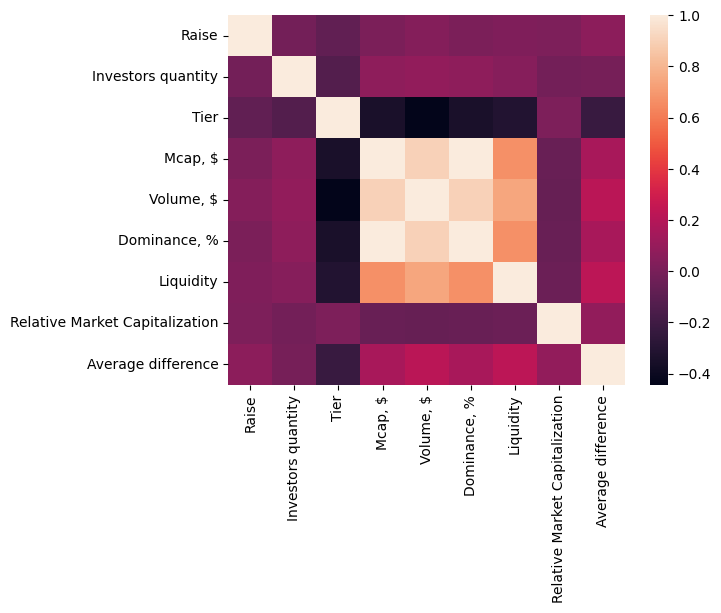

In [ ]:
sns.heatmap(df_total.corr())

> Линейная связь отсутствует, поэтому могут возникнуть проблемы при построении линейной регрессии. Необходимо это учитывать при построении модели

**Информация о конечных данных (по столбцам):**

Project - название проекта (стартапа) в Web3, который находится на стадии рейза

Date - дата фандрейза проекта

Raise - сумма финансирования (cумма, которую стартап собрал от инвесторов и/или венчурных фондов, $)

Stage - раунд/стадия развития стартапа, на которую приходится венчурное финансирование

Category - отрасль, тематика проекта

Investors quantity - количество инвесторов и/или венчурных фондов в проекте

Lead Investor - лид инвестор/ ведущий инвестор представленного раунда

Tier  - уровень инвестора на рынке (1 - топ и далее по убыванию)

Type - структура инвестиционного сообщества (фонд, компания, сервис-провайдер, ангел и т.д.)

Mcap, $ - market capitalization, рыночная капитализация

Volume, $  - объем, выраженный в долларах

Dominance, % - доля доминирования фонда на рынке

Liquidity - ликвидность и волатильность фонда *(добавленный собственноручно)*

Relative Market Capitalization - относительная рыночная капитализация, оценивающая вклад инвестора в рынок *(добавленный собственноручно)*

Average difference - признак позволяет оценить, как распределены прибыльность и убыточность *(добавленный собственноручно)*

# Выбросы

**Проанализируем данные на выбросы**

\

**Шаг 1**

Построим ящик с усами, чтобы понять, есть ли у нас выбросы или наши данные однородны

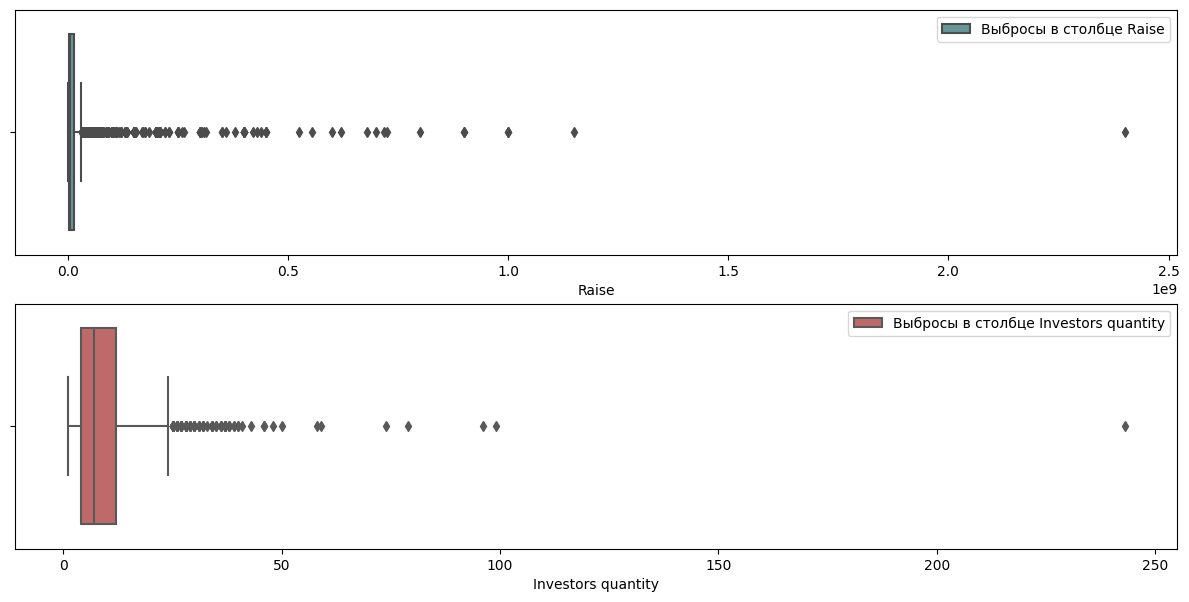

In [ ]:
fig, axs = plt.subplots(2,1, figsize = (15, 7), sharey=True)
hist_1 = sns.boxplot(data=df_total, x="Raise", color = 'cadetblue', ax = axs[0])
hist_1.legend(['Выбросы в столбце Raise'])
hist_2 = sns.boxplot(data = df_total, x ="Investors quantity", color = "indianred",ax = axs[1])
hist_2.legend(['Выбросы в столбце Investors quantity'])
plt.show()

- В первом графике есть выбросы в столбце "Raise", что вполне объяснимо: проекты могут получать разное количество финансирования в зависимости от множества факторов.
- В столбце "Investors quantity" также есть экстремальные значения: есть проекты, в которые входят множество инвесторов и занимают в них маленькие доли.
- Сравнивая ящики двух графиков, можно заключить, что в столбце "Investors quantity" разброс значений больше, чем в столбце "Raise".




> В первую очередь заметим, что ящики несимметричны - усики имеют разную длину, что указывает на наличие выбросов и асимметрии в данных.
Ассиметрия логична, ведь есть нижнее ограничение рейза (можно не поднять инвестиций вообще и у нас были такие примеры), а вот верхней границы тут нет: некоторые криптопроекты поднимают инвестиции в несколько миллиардов долларов.
>
> Что можно еще заметить - это сильно сжатые ящики, что указывает, что в данных нет значительной вариации или разброса и дисперсия скорее всего низкая.
>
> В третьих, у нас есть достаточно много выбросов, так как ящик содержит точки за пределами усов, эчто говорит о наличии экстремальных значений в данных.


**Шаг 2**

Чтобы избавиться от выбросов, которые исказят в будущем анализ и модель, мы использовали метод межквартильного размаха:


1) Вычислили первый и третий квантиль для переменной 'Raise' с помощью функции quantile

2) Вычислили межквартильного размаха (IQR) путем вычитания первого квантиля из третьего

3) Определили нижнюю и верхнюю границы для определения выбросов, которые не входят в данный диапазон


In [ ]:
q_1 = df_total['Raise'].quantile(0.25)
q_3 = df_total['Raise'].quantile(0.75)
IQR = q_3 - q_1
low = q_1 - 1.5 * IQR
up = q_3 + 1.5 * IQR

df_total_new = df_total[(df_total['Raise'] >= low) & (df_total['Raise'] <= up)]
df_total_new.head()

,Project,Date,Raise,Stage,Category,Investors quantity,Lead Investor,Tier,Type,"Mcap, $","Volume, $","Dominance, %",Liquidity,Relative Market Capitalization,Average difference
0,DeSchool,2022-12-31,6000000.000,Seed,Blockchain Service,6.000,y2z Ventures,4,Venture,358840000,23870000,0.030,0.000,11961333333.333,-0.200
1,NFTScan,2021-04-16,550000.000,Seed,NFT,1.000,y2z Ventures,4,Venture,358840000,23870000,0.030,0.000,11961333333.333,-0.200
3,Sealance,2022-10-24,6000000.000,Seed,Blockchain Service,6.000,Galaxy,1,Venture,225540000000,2010000000,19.270,4623000000.000,11704203425.013,0.484
4,Skip Protocol,2022-09-22,6500000.000,Unknown,Blockchain Service,37.000,Galaxy,1,Venture,225540000000,2010000000,19.270,4623000000.000,11704203425.013,0.484
5,Mural,2022-08-23,5600000.000,Seed,Blockchain Service,5.000,Galaxy,1,Venture,225540000000,2010000000,19.270,4623000000.000,11704203425.013,0.484


Посмотрим, что получилось:

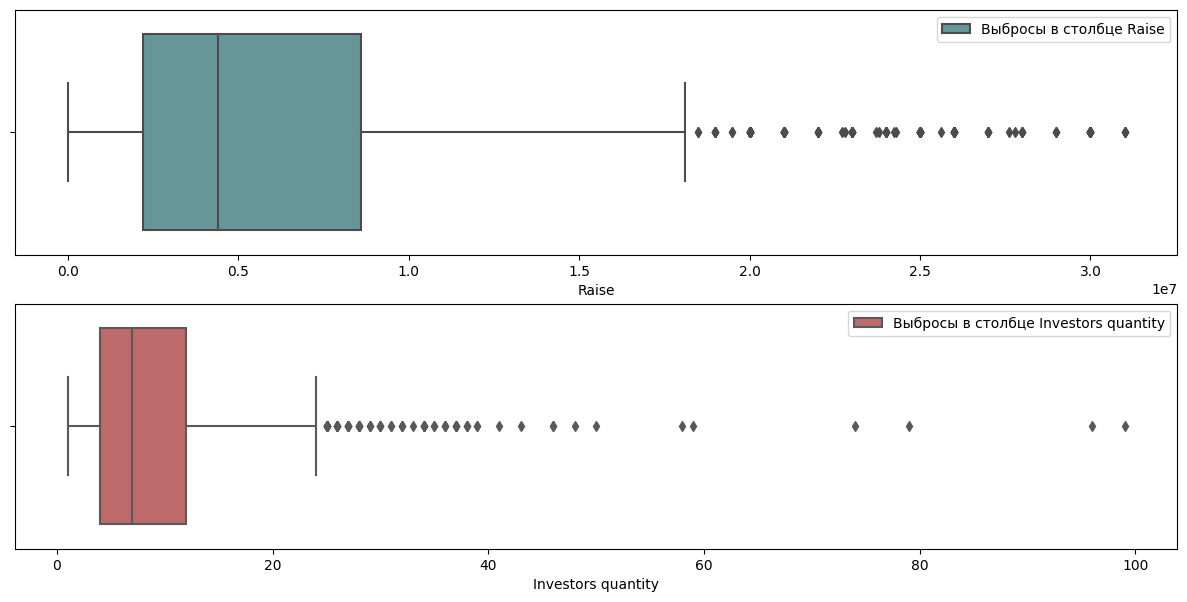

In [ ]:
fig, axs = plt.subplots(2,1, figsize = (15, 7), sharey=True)
hist_1 = sns.boxplot(data= df_total_new, x="Raise", color = 'cadetblue', ax = axs[0])
hist_1.legend(['Выбросы в столбце Raise'])
hist_2 = sns.boxplot(data = df_total_new, x ="Investors quantity", color = "indianred",ax = axs[1])
hist_2.legend(['Выбросы в столбце Investors quantity'])
plt.show()


> Ящики все еще несимметричны, но как обговаривалось ранне тут это логично. Также ящики менее сжатые и выбросов за их пределами меньше.
>
> В целом, метод межквартильного размаха улучшил ситуацию

# Визуализация

**Шаг 1**

Мы рассмотрели категориальный признак - Category

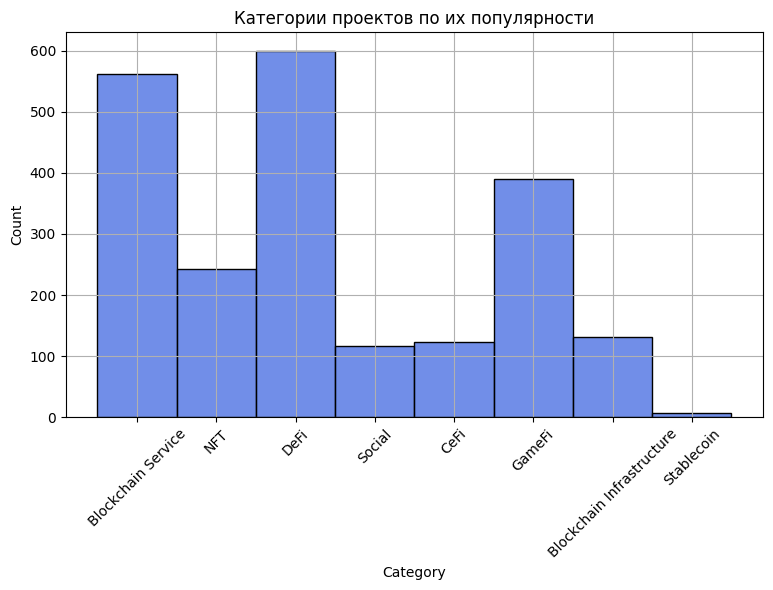

In [ ]:
plt.figure(figsize=(9, 5))
df_total['Category'].value_counts()
sns.histplot(data = df_total_new, x = 'Category', color = 'royalblue')
plt.xticks(rotation=45)
plt.grid(True)
plt.title('Категории проектов по их популярности')
plt.show()

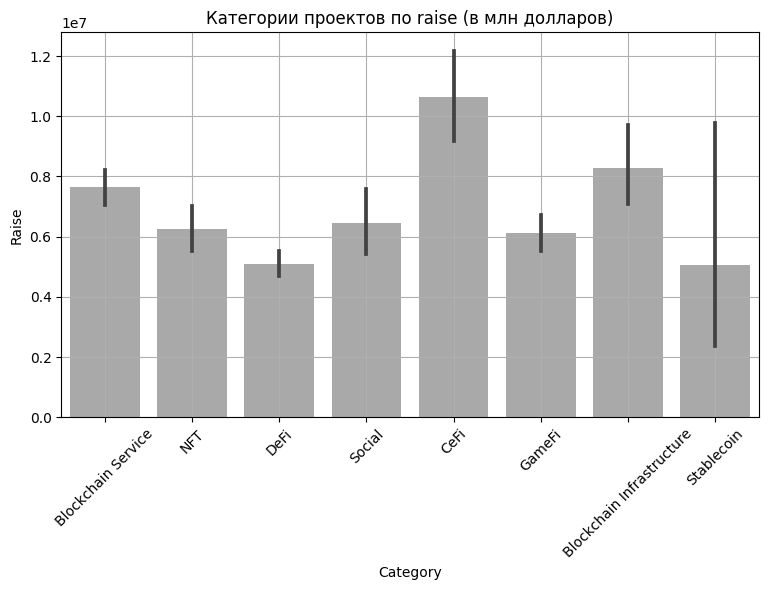

In [ ]:
plt.figure(figsize=(9, 5))
df_total['Category'].value_counts()
sns.barplot(data = df_total_new, x = 'Category', y = 'Raise', color = 'darkgrey')
plt.xticks(rotation=45)
plt.grid(True)
plt.title('Категории проектов по raise (в млн долларов)')
plt.show()

> Заметим, что лидирующие места по рейзу занимают CeFi и Infra, хотя проектов из этой категории тоже немного.
>
> Подавляющее количество проектов собрано в Blockchain Service и DeFi, что делает данные категории самыми разношерстными по показателям рейза.
>
> Многие скатегории (NFT, Social, GameFi) имеют приблизительно одинаковые показатели рейза.
>
> \
>
> *Несколько **выводов**:*
> 1.   Количество проектов в категории и рейз по ней имеют небольшую отрицательную корреляцию -  признаки друг от друга обратно зависимы
> 2.   Данный категориальный признак оказывает влияние на рейз, но оно несильное (так как многие данные имеют приблизительно одинаковые показатели)


**Шаг 2**

Посмотрим на признак - тир фонда

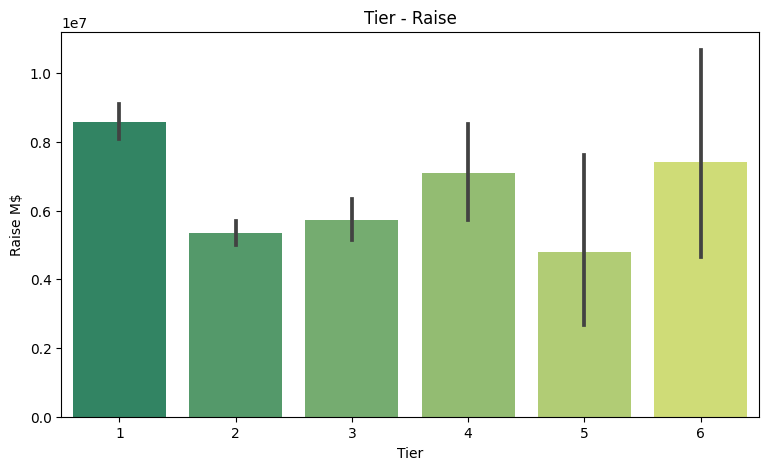

In [ ]:
fig = plt.figure(figsize = (9, 5))
sns.barplot(x="Tier", y="Raise", data=df_total_new, palette="summer")
plt.title("Tier - Raise")
plt.ylabel('Raise M$')
plt.show()

> Можно сделать **вывод**, что Raise не особо зависит от значения tier (больше ties != больше сумма рэйза)
>
> Тут логично, что у тир 1 фондов проекты с большим рейзом, так как у них есть и имя и многие фонды тир 2-5 заходят в проекты только после сильного лида. Также у этих фондов большие AUM, что чаще всего ведет к высокому ticketsize, и их доля в поднятых средствах составляет большую часть
>
> Вспомнив природу тир 6 инвесторов, также понимаем , почему это вторая группа по рейзу. Ангелы вносят свои деньги в проекты - их риски велики, они делают очень серьезный и тщательный дью-дилидженс, поэтому уровень проектов чаще всего высокий, что, конечно, ведет к будующему росту рейза

**Шаг 3**

Проанализируем показатель рейза

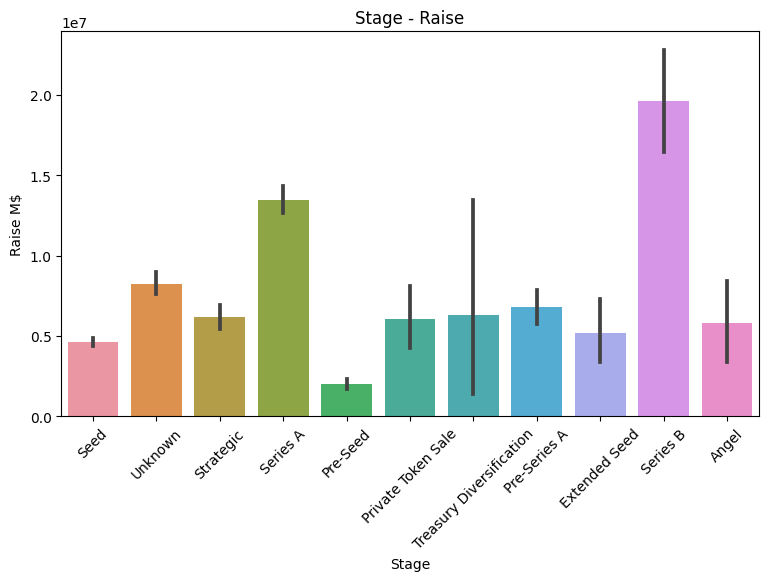

In [ ]:
stage_ind = df_total_new['Stage'].value_counts()[0:11].index.to_list()
pk = df_total_new[['Stage', 'Raise']][df_total_new['Stage'].apply(lambda x : x in stage_ind)]
plt.figure(figsize=(9, 5))
sns.barplot(data = pk, x= 'Stage', y = 'Raise')
plt.title("Stage - Raise")
plt.ylabel('Raise M$')
plt.xticks(rotation=45)
plt.show()

Мы поняли, что на стадии Series B проекты получают наибольшее финансирование.
Это может произойти вследствие того, что проекты серии B часто уже прошли начальную стадию разработки и продемонстрировали свою концепцию или бизнес-модель на практике. Кроме того, проекты серии B обычно нацелены на масштабирование своего бизнеса и расширение, поэтому инвесторы могут видеть высокий потенциал роста и масштабирования в этих проектах и вкладывают туда больше денег.

**Шаг 4**

Любопытно взглянуть, в какие сферы инвестируют топ фонды - даже просто, чтобы понять тренды последних лет и в каких проектах видят будущее криптовалютного рынка

Text(0.5, 1.0, 'В какие категории проектов инвестируют топ 10 лид инвесторов по рын. кап.')

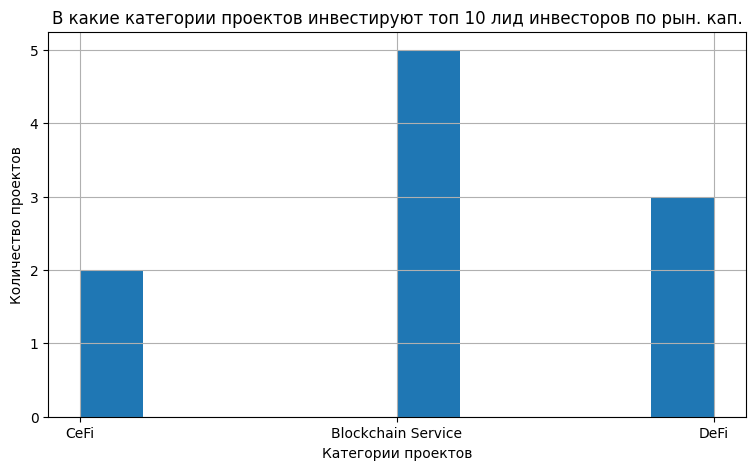

In [ ]:
plt.figure(figsize=(9, 5))
top_lead_ind = df_total_new['Mcap, $'].sort_values(ascending = False)[1:11].index.to_list() #Индексы топ 10 лид инвесторов по капитализации
df_total_new.iloc[top_lead_ind]['Category'].hist()
plt.xlabel('Категории проектов')
plt.ylabel('Количество проектов')
plt.title('В какие категории проектов инвестируют топ 10 лид инвесторов по рын. кап.')

**Шаг 5**

Далее рассмотрели признак - Date. Есть некоторые мысли по этому поводу, так как с 2021 года рынок подвергался взлетам и резким падениям, поэтому очень интересно проанализировать именно эту взаимосвязь

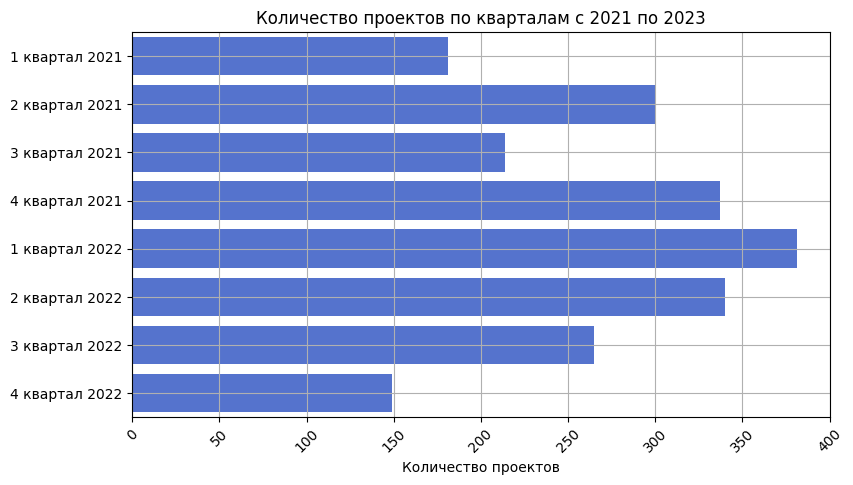

In [ ]:
funding_rounds_Q = df_total_new
first_cvar_2021 = funding_rounds_Q[(funding_rounds_Q['Date'] >= '2021-01-01') & (funding_rounds_Q['Date'] <= '2021-03-31')]
second_cvar_2021 = funding_rounds_Q[(funding_rounds_Q['Date'] > '2021-03-31') & (funding_rounds_Q['Date'] <= '2021-06-30')]
third_cvar_2021 = funding_rounds_Q[(funding_rounds_Q['Date'] > '2021-06-30') & (funding_rounds_Q['Date'] <= '2021-09-30')]
forth_cvar_2021 = funding_rounds_Q[(funding_rounds_Q['Date'] > '2021-09-30') & (funding_rounds_Q['Date'] <= '2021-12-31')]
number_projects_1_2021 = len(first_cvar_2021['Project'])
number_projects_2_2021 = len(second_cvar_2021['Project'])
number_projects_3_2021 = len(third_cvar_2021['Project'])
number_projects_4_2021 = len(forth_cvar_2021['Project'])

first_cvar_2022 = funding_rounds_Q[(funding_rounds_Q['Date'] > '2022-01-01') & (funding_rounds_Q['Date'] <= '2022-03-31')]
second_cvar_2022 = funding_rounds_Q[(funding_rounds_Q['Date'] > '2022-03-31') & (funding_rounds_Q['Date'] <= '2022-06-30')]
third_cvar_2022 = funding_rounds_Q[(funding_rounds_Q['Date'] > '2022-06-30') & (funding_rounds_Q['Date'] <= '2022-09-30')]
forth_cvar_2022 = funding_rounds_Q[(funding_rounds_Q['Date'] > '2022-09-30') & (funding_rounds_Q['Date'] <= '2022-12-31')]
number_projects_1_2022 = len(first_cvar_2022['Project'])
number_projects_2_2022 = len(second_cvar_2022['Project'])
number_projects_3_2022 = len(third_cvar_2022['Project'])
number_projects_4_2022 = len(forth_cvar_2022['Project'])

Number_project_per_cvartal = [number_projects_1_2021, number_projects_2_2021, number_projects_3_2021, number_projects_4_2021,
                             number_projects_1_2022, number_projects_2_2022, number_projects_3_2022, number_projects_4_2022]
data_cvar = ['1 квартал 2021', '2 квартал 2021', '3 квартал 2021', '4 квартал 2021', '1 квартал 2022', '2 квартал 2022', '3 квартал 2022', '4 квартал 2022']
plt.figure(figsize=(9, 5))
sns.barplot(y = data_cvar, x = Number_project_per_cvartal, color = 'royalblue', orient = "h")
plt.xticks(rotation=45)
plt.grid(True)
plt.title('Количество проектов по кварталам с 2021 по 2023')
plt.xlabel('Количество проектов')
plt.show()

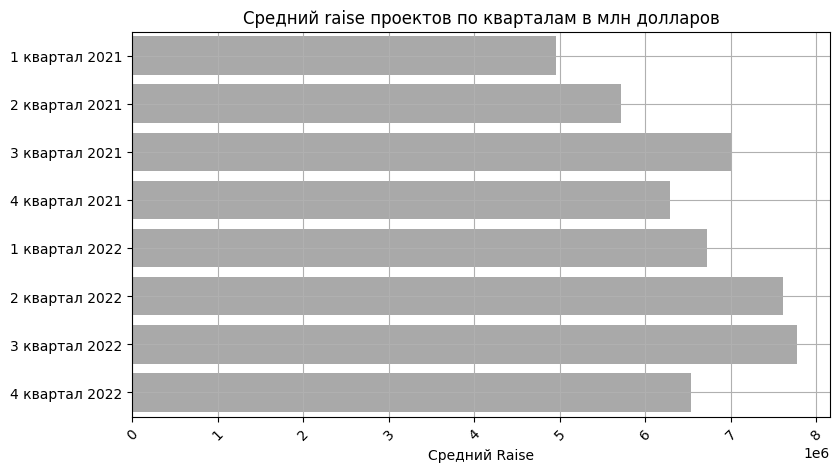

In [ ]:
first_cvar_2021 = funding_rounds_Q[(funding_rounds_Q['Date'] >= '2021-01-01') & (funding_rounds_Q['Date'] <= '2021-03-31')]
second_cvar_2021 = funding_rounds_Q[(funding_rounds_Q['Date'] > '2021-03-31') & (funding_rounds_Q['Date'] <= '2021-06-30')]
third_cvar_2021 = funding_rounds_Q[(funding_rounds_Q['Date'] > '2021-06-30') & (funding_rounds_Q['Date'] <= '2021-09-30')]
forth_cvar_2021 = funding_rounds_Q[(funding_rounds_Q['Date'] > '2021-09-30') & (funding_rounds_Q['Date'] <= '2021-12-31')]
mean_raise_1_2021 = first_cvar_2021['Raise'].mean()
mean_raise_2_2021 = second_cvar_2021['Raise'].mean()
mean_raise_3_2021 = third_cvar_2021['Raise'].mean()
mean_raise_4_2021 = forth_cvar_2021['Raise'].mean()


first_cvar_2022 = funding_rounds_Q[(funding_rounds_Q['Date'] > '2022-01-01') & (funding_rounds_Q['Date'] <= '2022-03-31')]
second_cvar_2022 = funding_rounds_Q[(funding_rounds_Q['Date'] > '2022-03-31') & (funding_rounds_Q['Date'] <= '2022-06-30')]
third_cvar_2022 = funding_rounds_Q[(funding_rounds_Q['Date'] > '2022-06-30') & (funding_rounds_Q['Date'] <= '2022-09-30')]
forth_cvar_2022 = funding_rounds_Q[(funding_rounds_Q['Date'] > '2022-09-30') & (funding_rounds_Q['Date'] <= '2022-12-31')]
mean_raise_1_2022 = first_cvar_2022['Raise'].mean()
mean_raise_2_2022 = second_cvar_2022['Raise'].mean()
mean_raise_3_2022 = third_cvar_2022['Raise'].mean()
mean_raise_4_2022 = forth_cvar_2022['Raise'].mean()
data_cvar = ['1 квартал 2021', '2 квартал 2021', '3 квартал 2021', '4 квартал 2021', '1 квартал 2022', '2 квартал 2022', '3 квартал 2022', '4 квартал 2022']
mean_raise = [mean_raise_1_2021, mean_raise_2_2021, mean_raise_3_2021, mean_raise_4_2021, mean_raise_1_2022, mean_raise_2_2022, mean_raise_3_2022, mean_raise_4_2022]


plt.figure(figsize=(9, 5))
sns.barplot(y = data_cvar, x = mean_raise, color = 'darkgrey', orient = "h")
plt.xticks(rotation=45)
plt.grid(True)
plt.title('Средний raise проектов по кварталам в млн долларов')
plt.xlabel('Средний Raise')
plt.show()

> По получившимся графикам прослеживается корреляция с ценами криптовалютного рынка:
> *   пандемия в 2021 году привела к огромному скачку капитализаций цифровых активов и вызвало огромный интерес к криптовалюте, что послужило стимвулом создания проектов в Web3 и инвестирования в быстроменяющиеся тренды растущего рынка
> *   во 2-3 квартале 2022 года произошел обвал криптовалютного сегмента, что послужило началом криптозимы
>
> Есть два типа инвесторов: те, кто входят в много проектов с низкими чеками и те, кто инвестируют очень изборочно, но с большим ticketsize. Так криптозима могла сказаться и на тех, и на тех, но в разной мере.
>
> Как мы видим количество проектов, которые собирают раунды резко снизилось с падением цен активов, а вот показатель сренего рейза хоть и снизился, но не так резко, как того ожидалось. Это можно объяснить несколькими причинами:
> *   Многие проекты перенесли свои запуски на биржах (как на CEX, так и на DEX) из-за непопулярности рынка и большого риска плохого лаунча
> *   Многие фонды и инвесторы потеряли свои активы и у них нет возможности продолжать деятельность, а это в большей мере фонды tier 3-5. Средние/слабые проекты это понимают и поэтому не начинают или затягивают раунды
> *   Но сильные фонды продолжают деятельность, так еще и более активно, так как лучше инвестировать и покупать активы на низах рынка, поэтому показатель среднего рейза не так сильно упал, ведь tier 1-2 фонды имеют высокий AUM даже после обвала рынка и готовы заходить в сильные проекты во время криптозимы с большими суммами
>
> \
>
> *Тут можно выдвинуть интересную **гипотезу**:*
> 1.   Дата оказывает влияние на рейз (в 1Q 2022 показатель растет, в 3Q снижается), но не так значительно, как количество стартапов, которые поднимают рейз
>

# Гипотезы

**1 Гипотеза - дата**

Начнем с гипотезы про дату:

Так как мы взяли ограниченный временной промежуток, если рассматривать данные по кварталам получится слишком маленькая выборка, которая не будет репрезентативной.

Поэтому мы приняли решение посмотреть взимосвязь по месяцам

- разбили данные на месяцы и посчитали среднее значение рейза и количество проектов в месяце, которые находятся на стадии рейза

In [ ]:
df_total_stat = df_total_new.copy()
df_total_stat['Month'] = df_total_stat['Date'].dt.to_period('M')

monthly_mean_raise = df_total_stat.groupby('Month')['Raise'].mean()
monthly_project_count = df_total_stat.groupby('Month')['Project'].count()

- рассмотрим корреляцию по месяцам между средним рейзом и количеством проектов

**H0:** коэффициент корреляции между показателями равен нулю или близок к нулю

**H1:** наличие ненулевой корреляционной связи между переменными

> Больше всего подойдет для рассмотрения гипотезы коэффициент корреляции Пирсона и Z-статистику

-----

- рассмотрим волатильность показателей среднего рейза по месяцам и количества проектов

**H0:** нет статистически значимых различий в волатильности количества проектов и волатильности среднего рейза

**H1:** волатильность количества проектов и волатильность среднего рейза различны

> Больше всего подойдет для рассмотрения гипотезы тест Левена для проверки гомоскедастичности - однородности дисперсий между двумя группами данных

----

> **Предпосылки**
> - нормальность рапределения (проверим через тест Шапиро-Уилка)
>- гомоскедастичности (проверим через тест Бройша-Пагана)



In [ ]:
import statsmodels.api as sm
from scipy.stats import shapiro

_, p_value_norm_raise = shapiro(monthly_mean_raise)
_, p_value_norm_count = shapiro(monthly_project_count)

p_value_norm_raise, p_value_norm_count

(0.7987710237503052, 0.39010846614837646)

Уровень значимости = 0.05.
В данном случае, оба p_значения значительно больше уровня значимости.

На основании полученных результатов можно предположить, что предпосылка о нормальности выполнена для обоих наборов данных

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan

X = sm.add_constant(monthly_project_count)
model = sm.OLS(monthly_mean_raise, X)
results = model.fit()
_, p_value_br, _, _ = het_breuschpagan(results.resid, X)
p_value_br

0.6856611420195327

Предпосылка о гомоскедастичности выполнена для данного набора данных

Тогда переходим к гипотезам:

In [ ]:
from scipy.stats import pearsonr, norm

monthly_mean_raise = monthly_mean_raise.astype(float)

corr_raise, _ = pearsonr(monthly_mean_raise, monthly_project_count)
corr_raise_z = np.arctanh(corr_raise)

n = len(monthly_mean_raise)
se_raise = 1 / (n - 3) ** 0.5
se_raise_z = se_raise / (1 - corr_raise ** 2) ** 0.5

z_statistic = abs(corr_raise_z / se_raise_z)
p_value = 2 * (1 - norm.cdf(z_statistic))

print('corr', corr_raise)
print('Z_stat:', z_statistic)
print('p_value:', p_value)

corr 0.1329910579300203
Z_stat: 0.6076274108222888
p_value: 0.5434346166949711


p_value **больше** уровенz значимости 0.05. Поэтому, на основании данного анализа, нет оснований для отвержения нулевой гипотезы, что означает, что не существует статистически значимой корреляционной связи между рассматриваемыми показателями



> Интересно заметить, что тут очень маленькая положительная корреляционная связь, хотя при квартальном рассмотрении там даже просто по графику видно, что есть одинаковый тренд



In [ ]:
from scipy.stats import levene

_, p_value = levene(monthly_project_count, monthly_mean_raise)

alpha = 0.05
p_value

5.43888863997587e-06

p_value **меньше** выбранного уровня значимости 0.05. Поэтому есть основания отвергнуть нулевую гипотезу, что означает, что существуют статистически значимые различия в волатильности количества проектов и волатильности среднего рейза



> Тут заключение совпало с графиком по кварталам: волатильность разная. Количество проектов, которые на рейзе более чувствительны к раночным шокам



**2 Гипотеза:**

**H0:** Средние значения Raise не различаются для разных категорий проектов.

**H1:** Средние значения Raise различаются для разных категорий проектов.

Почему были выбраны такие гипотезы? Во-первых, категория проекта - достаточно специфическое понятие. Очень многие инвесторы вкладываются в кучу различных стартапов и для них категория проекта не особо важный признак, так как они стараются диверсифицировать свой портфель из инвестиций и вкладываются во все по-немногу. Конечно, они не будут всегда вкладывать деньги ровно в одну категорию проектов, это слишком рискованно для них, но так как в области криптовалют (и, в частности, в наших данных) эти категории имеют вполне "условные" границы, логично предположить, что в среднем Raise будет одинаковый во всех категориях проектов


In [ ]:
import pandas as pd
import scipy.stats as stats

raise_values_by_category = df_total_new.groupby("Category")["Raise"].apply(list)

f_statistic, p_value = stats.f_oneway(*raise_values_by_category)

p_value

5.1754499486667276e-21

p_value **меньше** выбранного уровня значимости 0.05. Отвергаем нулевую гипотезу, средние значения Raise различаются для разных категорий проектов


> В действительности средние Raise отличаются в зависимости от категории проекта. Это можно объяснить тем, что в любом случае есть популярные категории и мода, есть тенденции. Для инвесторов крайне важно быть в курсе основных мейнстримов (в хорошем смысле) в венчурном крипто-инвестировании, поскольку именно это задает фундамент для краткосрочного и долгосрочного роста крипто-стартапа. Категория, которая "на хайпе" безусловно будет получать более высокий рейз, чем та, что находится в тени.



Посмотрим на прошлый график. Действительно, он подтверждает наши выводы.

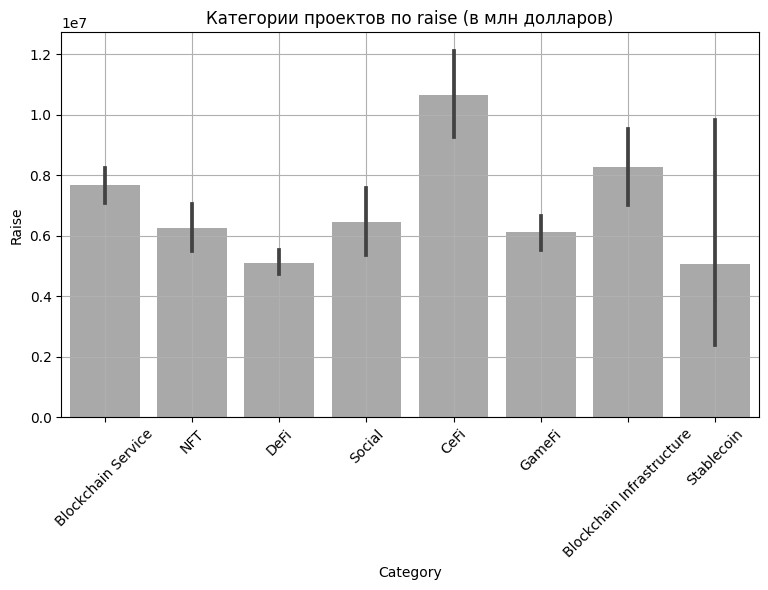

In [ ]:
plt.figure(figsize=(9, 5))
df_total['Category'].value_counts()
sns.barplot(data = df_total_new, x = 'Category', y = 'Raise', color = 'darkgrey')
plt.xticks(rotation=45)
plt.grid(True)
plt.title('Категории проектов по raise (в млн долларов)')
plt.show()

# Машинное обучение


Что касается блока "Машинное обучение", то тут седующие планы:


В качестве переменной, которую будем предсказывать, выбрали колонку RAISE
Импортируем все нужные библиотеки. МЫ будем использовать следующие модели: Линейная регрессия, Ridge-регрессия, Lasso-регрессия, а также рещающие деревья и случайные леса. Начнём с регрессии:



In [ ]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor

Удалим все не нужные столбцы, которые вряд ли помогут нам в предсказании переменной Raise. Также выделим наш таргет.

In [ ]:
df_total_new

,Project,Date,Raise,Stage,Category,Investors quantity,Lead Investor,Tier,Type,"Mcap, $","Volume, $","Dominance, %",Liquidity,Relative Market Capitalization,Average difference
0,DeSchool,2022-12-31,6000000.000,Seed,Blockchain Service,6.000,y2z Ventures,4,Venture,358840000,23870000,0.030,0.000,11961333333.333,-0.200
1,NFTScan,2021-04-16,550000.000,Seed,NFT,1.000,y2z Ventures,4,Venture,358840000,23870000,0.030,0.000,11961333333.333,-0.200
3,Sealance,2022-10-24,6000000.000,Seed,Blockchain Service,6.000,Galaxy,1,Venture,225540000000,2010000000,19.270,4623000000.000,11704203425.013,0.484
4,Skip Protocol,2022-09-22,6500000.000,Unknown,Blockchain Service,37.000,Galaxy,1,Venture,225540000000,2010000000,19.270,4623000000.000,11704203425.013,0.484
5,Mural,2022-08-23,5600000.000,Seed,Blockchain Service,5.000,Galaxy,1,Venture,225540000000,2010000000,19.270,4623000000.000,11704203425.013,0.484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2518,GoCrypto TokenGOC,2021-01-07,4000000.000,Strategic,Blockchain Service,2.000,Roger Ver,6,Angel Investor,299730000,1710000,0.030,0.000,9991000000.000,-0.200
2519,Wrapped NXMWNXM,2021-02-16,2700000.000,Unknown,DeFi,6.000,Collider Ventures,4,Venture,96620000,1490000,0.010,0.000,9662000000.000,-0.200
2520,Arca,2021-01-13,10000000.000,Series A,CeFi,2.000,RRE Ventures,4,Venture,30820000000,808250000,2.630,0.000,11718631178.707,0.500
2521,Conflux NetworkCFX,2021-01-12,5000000.000,Grant,Blockchain Infrastructure,1.000,Shanghai Science and Technology Committee,4,Corporate,538530000,37460000,0.050,0.000,10770600000.000,1.000


In [ ]:
X = df_total_new.drop(columns = ['Project', 'Date', 'Raise', 'Lead Investor'])
y = df_total_new['Raise']

In [ ]:
numeric_features = ['Investors quantity', 'Mcap, $', 'Volume, $', 'Dominance, %',
                    'Liquidity', 'Relative Market Capitalization', 'Average difference']
categorical_features= ['Tier', 'Type', 'Category', 'Stage']

Приведём данные в порядок. Проскалируем их и закодируем категориальные переменные.

In [ ]:
column_transformer = ColumnTransformer([
    ('scaling', StandardScaler(), numeric_features),
    ('ohe', OneHotEncoder(handle_unknown="ignore", drop="first",
                         min_frequency=0.01), categorical_features)
])

Разделим нашу выборку на тест и трейн

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)

Проведём обработку наших колонок

In [ ]:
X_train = column_transformer.fit_transform(X_train)
X_test = column_transformer.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Обучим самую обыкновенную линейную регрессию. В качестве метрик будут выступать MAE, MSE и R2-score

In [ ]:
clf_lr = LinearRegression()
clf_lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = clf_lr.predict(X_test)
y_pred_train = clf_lr.predict(X_train)
print("Test MAE = %.4f" % metrics.mean_absolute_error(y_test, y_pred))
print("Train MAE = %.4f" % metrics.mean_absolute_error(y_train, y_pred_train))
print(f"Train MSE: { metrics.mean_squared_error(y_train, y_pred_train)}")
print(f"Test MSE: { metrics.mean_squared_error(y_test, y_pred)}")
print(f"Train R2: { metrics.r2_score(y_train, y_pred_train)}")
print(f"Test R2: { metrics.r2_score(y_test, y_pred)}")

Test MAE = 3906854.2590
Train MAE = 3622849.6414
Train MSE: 26202906701920.047
Test MSE: 31521613086433.57
Train R2: 0.34908324167257454
Test R2: 0.2715629970849702


Получились довольно плохие результаты. Наша модель описывает тестовые данные только на 27 процентов. Значение MSE огромное. В MAE мы ошибаемся на 3 миллиона долларов, что довольно существенно. Давайте попробуем применить другие модели.

 **Обучим Ridge регрессию**

In [ ]:
ridge_lr = Ridge(max_iter = 1000, solver = 'auto').fit(X_train, y_train)
y_pred = ridge_lr.predict(X_test)
y_pred_train = ridge_lr.predict(X_train)
print("Test MAE = %.4f" % metrics.mean_absolute_error(y_test, y_pred))
print("Train MAE = %.4f" % metrics.mean_absolute_error(y_train, y_pred_train))
print(f"Train MSE: { metrics.mean_squared_error(y_train, y_pred_train)}")
print(f"Test MSE: { metrics.mean_squared_error(y_test, y_pred)}")
print(f"Train R2: { metrics.r2_score(y_train, y_pred_train)}")
print(f"Test R2: { metrics.r2_score(y_test, y_pred)}")

Test MAE = 3909943.5119
Train MAE = 3624987.2558
Train MSE: 26230955234773.53
Test MSE: 31682252540406.227
Train R2: 0.34838647698579683
Test R2: 0.2678507593235052


Попробуем подобрать параметры по сетке

In [ ]:
param = {'fit_intercept': [True, False], 'alpha': [1, 2, 5, 10], 'positive': [True, False]}
grid_ridge_lr = GridSearchCV(estimator = ridge_lr, param_grid = param, scoring = 'r2')
grid_ridge_lr.fit(X_train, y_train)
print(grid_ridge_lr.best_params_)

{'alpha': 5, 'fit_intercept': True, 'positive': False}


In [ ]:
ridge_best =  grid_ridge_lr.best_estimator_
ridge_best.fit(X_train, y_train)
y_pred = ridge_best.predict(X_test)
y_pred_train = ridge_best.predict(X_train)

print("Test MAE = %.4f" % metrics.mean_absolute_error(y_test, y_pred))
print("Train MAE = %.4f" % metrics.mean_absolute_error(y_train, y_pred_train))
print(f"Train MSE: { metrics.mean_squared_error(y_train, y_pred_train)}")
print(f"Test MSE: { metrics.mean_squared_error(y_test, y_pred)}")
print(f"Train R2: { metrics.r2_score(y_train, y_pred_train)}")
print(f"Test R2: { metrics.r2_score(y_test, y_pred)}")

Test MAE = 3912467.5646
Train MAE = 3630681.2455
Train MSE: 26358557421931.22
Test MSE: 31856909815231.645
Train R2: 0.3452166606381285
Test R2: 0.26381458194063223


Ситуация с обычной регрессией стала немного лучше в трейне, однако на тесте модель показала результаты ещё хуже. Попробуем обучить Lasso регрессию.

**Обучим Lasso регрессию**

In [ ]:
lasso_lr = Lasso(max_iter = 1000, random_state = 29).fit(X_train, y_train)
y_pred = lasso_lr.predict(X_test)
y_pred_train = lasso_lr.predict(X_train)
print("Test MAE = %.4f" % metrics.mean_absolute_error(y_test, y_pred))
print("Train MAE = %.4f" % metrics.mean_absolute_error(y_train, y_pred_train))
print(f"Train MSE: { metrics.mean_squared_error(y_train, y_pred_train)}")
print(f"Test MSE: { metrics.mean_squared_error(y_test, y_pred)}")
print(f"Train R2: { metrics.r2_score(y_train, y_pred_train)}")
print(f"Test R2: { metrics.r2_score(y_test, y_pred)}")

Test MAE = 3909975.1533
Train MAE = 3623016.2574
Train MSE: 26209265269929.91
Test MSE: 31596582752169.57
Train R2: 0.3489252859723284
Test R2: 0.2698305134564031


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.950e+16, tolerance: 6.115e+12
  model = cd_fast.enet_coordinate_descent(


In [ ]:
param = {'fit_intercept': [True, False], 'alpha': [0.01, 0.1, 0, 1, 2, 5, 20, 100, 2000]}
grid_lasso_lr = GridSearchCV(estimator = lasso_lr, param_grid = param, scoring = 'r2')
grid_lasso_lr.fit(X_train, y_train)
print(grid_lasso_lr.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.647e+16, tolerance: 4.939e+12
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.537e+16, tolerance: 4.879e+12
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.547e+16, tolerance: 4.762e

{'alpha': 2000, 'fit_intercept': True}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.688e+13, tolerance: 1.033e+13
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.329e+13, tolerance: 9.872e+12
  model = cd_fast.enet_coordinate_descent(


In [ ]:
lasso_best =  grid_lasso_lr.best_estimator_
lasso_best.fit(X_train, y_train)
y_pred = lasso_best.predict(X_test)
y_pred_train = lasso_best.predict(X_train)

print("Test MAE = %.4f" % metrics.mean_absolute_error(y_test, y_pred))
print("Train MAE = %.4f" % metrics.mean_absolute_error(y_train, y_pred_train))
print(f"Train MSE: { metrics.mean_squared_error(y_train, y_pred_train)}")
print(f"Test MSE: { metrics.mean_squared_error(y_test, y_pred)}")
print(f"Train R2: { metrics.r2_score(y_train, y_pred_train)}")
print(f"Test R2: { metrics.r2_score(y_test, y_pred)}")

Test MAE = 3908510.0122
Train MAE = 3621168.3714
Train MSE: 26220811399870.516
Test MSE: 31645134743861.324
Train R2: 0.3486384639965201
Test R2: 0.26870851924828565


Тут ситуация немного получше: модель увеличила качества на тестовой выборке, однако по сравнению с обычной линейной регрессией результат получается хуже. Возможно данные связаны нелинейно и нужно использовать полиномы?

In [ ]:
polinom_transform = PolynomialFeatures(2)

X_train_poly = polinom_transform.fit_transform(X_train)
X_test_poly = polinom_transform.transform(X_test)

clf_lr.fit(X_train_poly, y_train)
y_pred = clf_lr.predict(X_test_poly)
y_pred_train = clf_lr.predict(X_train_poly)
print("Test MAE = %.4f" % metrics.mean_absolute_error(y_test, y_pred))
print("Train MAE = %.4f" % metrics.mean_absolute_error(y_train, y_pred_train))
print(f"Train MSE: { metrics.mean_squared_error(y_train, y_pred_train)}")
print(f"Test MSE: { metrics.mean_squared_error(y_test, y_pred)}")
print(f"Train R2: { metrics.r2_score(y_train, y_pred_train)}")
print(f"Test R2: { metrics.r2_score(y_test, y_pred)}")

Test MAE = 1606932880731511.2500
Train MAE = 2915379.0818
Train MSE: 18021292849507.402
Test MSE: 2.6214239598448407e+32
Train R2: 0.5523259439911292
Test R2: -6.057882277290128e+18


In [ ]:
lasso_best.fit(X_train_poly, y_train)
y_pred = lasso_best.predict(X_test_poly)
y_pred_train = lasso_best.predict(X_train_poly)
print("Test MAE = %.4f" % metrics.mean_absolute_error(y_test, y_pred))
print("Train MAE = %.4f" % metrics.mean_absolute_error(y_train, y_pred_train))
print(f"Train MSE: { metrics.mean_squared_error(y_train, y_pred_train)}")
print(f"Test MSE: { metrics.mean_squared_error(y_test, y_pred)}")
print(f"Train R2: { metrics.r2_score(y_train, y_pred_train)}")
print(f"Test R2: { metrics.r2_score(y_test, y_pred)}")

Test MAE = 4182110.7827
Train MAE = 3129560.3622
Train MSE: 19628001511444.98
Test MSE: 40061032080653.92
Train R2: 0.5124130592985172
Test R2: 0.07422446743139965


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.684e+15, tolerance: 6.115e+12
  model = cd_fast.enet_coordinate_descent(


In [ ]:
ridge_best.fit(X_train_poly, y_train)
y_pred = ridge_best.predict(X_test_poly)
y_pred_train = ridge_best.predict(X_train_poly)
print("Test MAE = %.4f" % metrics.mean_absolute_error(y_test, y_pred))
print("Train MAE = %.4f" % metrics.mean_absolute_error(y_train, y_pred_train))
print(f"Train MSE: { metrics.mean_squared_error(y_train, y_pred_train)}")
print(f"Test MSE: { metrics.mean_squared_error(y_test, y_pred)}")
print(f"Train R2: { metrics.r2_score(y_train, y_pred_train)}")
print(f"Test R2: { metrics.r2_score(y_test, y_pred)}")

Test MAE = 4009792.5411
Train MAE = 3200038.0758
Train MSE: 20349456694083.28
Test MSE: 33705557644185.14
Train R2: 0.4944911060547944
Test R2: 0.22109394196970933


К сожалению, даже полиномы нас не спасли. Скорее всего, всё дело в том, что линейные модели не могут решить такую задачу из-за того что у признаков отсутствует линейная связь с целевой переменной. Надеюсь,  ошибки в обработке данных не были допущены и результаты действительно пусть и плохие, но без ошибок. Однако, остались ещё модели, которые как раз должны учитывать эту нелинейность, передём к ним

**Попробуем построить леса и решающие деревья**

In [ ]:
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
y_pred_train = dt.predict(X_train)
print("Test MAE = %.4f" % metrics.mean_absolute_error(y_test, y_pred))
print("Train MAE = %.4f" % metrics.mean_absolute_error(y_train, y_pred_train))
print(f"Train MSE: { metrics.mean_squared_error(y_train, y_pred_train)}")
print(f"Test MSE: { metrics.mean_squared_error(y_test, y_pred)}")
print(f"Train R2: { metrics.r2_score(y_train, y_pred_train)}")
print(f"Test R2: { metrics.r2_score(y_test, y_pred)}")

Test MAE = 4623254.5691
Train MAE = 167337.0639
Train MSE: 946678261465.8766
Test MSE: 48556899110699.78
Train R2: 0.976483191267965
Test R2: -0.12210761429175143


**Попробуем подобрать параметры**

In [ ]:
param = {'max_depth': [3, 7, 12, 16, 20], 'min_samples_leaf': [1, 5, 10, 15, 20], 'min_samples_split': [2, 3, 4, 5, 6],
        'min_samples_leaf': [1, 2, 3, 4, 5]}
grid_dt = GridSearchCV(estimator = dt, param_grid = param, scoring = 'r2')
grid_dt.fit(X_train, y_train)
print(grid_dt.best_params_)

{'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [ ]:
dt_best =  grid_dt.best_estimator_
dt_best.fit(X_train, y_train)
y_pred = dt_best.predict(X_test)
y_pred_train = dt_best.predict(X_train)
print("Test MAE = %.4f" % metrics.mean_absolute_error(y_test, y_pred))
print("Train MAE = %.4f" % metrics.mean_absolute_error(y_train, y_pred_train))
print(f"Train MSE: { metrics.mean_squared_error(y_train, y_pred_train)}")
print(f"Test MSE: { metrics.mean_squared_error(y_test, y_pred)}")
print(f"Train R2: { metrics.r2_score(y_train, y_pred_train)}")
print(f"Test R2: { metrics.r2_score(y_test, y_pred)}")

Test MAE = 4074121.0329
Train MAE = 3819316.4838
Train MSE: 28791596450109.66
Test MSE: 35462865950330.07
Train R2: 0.28477657682903057
Test R2: 0.1804840787556713


Получается результат ещё хуже. В голове появляется гипотеза о том, что данные вообще не имеют связи и предсказазать нормально целевую переменную невозможно. Надеюсь, никакие ошибки в обработке данных не были допущены.

**Построим случайный лес**

In [ ]:
rf = RandomForestRegressor(n_estimators=50, random_state=123, n_jobs=4)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_pred_train = rf.predict(X_train)
print("Test MAE = %.4f" % metrics.mean_absolute_error(y_test, y_pred))
print("Train MAE = %.4f" % metrics.mean_absolute_error(y_train, y_pred_train))
print(f"Train MSE: { metrics.mean_squared_error(y_train, y_pred_train)}")
print(f"Test MSE: { metrics.mean_squared_error(y_test, y_pred)}")
print(f"Train R2: { metrics.r2_score(y_train, y_pred_train)}")
print(f"Test R2: { metrics.r2_score(y_test, y_pred)}")

Test MAE = 3945626.9355
Train MAE = 1477425.8274
Train MSE: 4947020485624.319
Test MSE: 33598754510781.465
Train R2: 0.8771091095154725
Test R2: 0.2235620692887389


Внимание, может быть очень долго! В джупитере подбиралось быстрее, за 1 минуту.

In [ ]:
param = {'max_depth': [1, 2, 3, 4, 5, 7], 'min_samples_leaf': [1, 5, 10, 15, 20], 'min_samples_split': [2, 3, 4, 5, 6],
        'min_samples_leaf': [1, 2, 3, 4, 5]}
grid_rf = GridSearchCV(estimator = rf, param_grid = param, scoring = 'r2')
grid_rf.fit(X_train, y_train)
print(grid_rf.best_params_)

{'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [ ]:
rf_best =  grid_rf.best_estimator_
rf_best.fit(X_train, y_train)
y_pred = rf_best.predict(X_test)
y_pred_train = rf_best.predict(X_train)
print("Test MAE = %.4f" % metrics.mean_absolute_error(y_test, y_pred))
print("Train MAE = %.4f" % metrics.mean_absolute_error(y_train, y_pred_train))
print(f"Train MSE: { metrics.mean_squared_error(y_train, y_pred_train)}")
print(f"Test MSE: { metrics.mean_squared_error(y_test, y_pred)}")
print(f"Train R2: { metrics.r2_score(y_train, y_pred_train)}")
print(f"Test R2: { metrics.r2_score(y_test, y_pred)}")

Test MAE = 3970388.6387
Train MAE = 3182500.8720
Train MSE: 19918057003099.34
Test MSE: 32831053875719.11
Train R2: 0.5052076762274518
Test R2: 0.24130296180611666


Случайные леса, к сожалению, также не помогли решить проблему.

**Бэггинг**

In [ ]:
bag = BaggingRegressor(dt_best, n_estimators=50, n_jobs=4)
bag.fit(X_train, y_train)
y_pred_train = bag.predict(X_train)
y_pred =  bag.predict(X_test)
# TODO: рассчитайте MSE на тренировочной и тестовой выборках
print("Test MAE = %.4f" % metrics.mean_absolute_error(y_test, y_pred))
print("Train MAE = %.4f" % metrics.mean_absolute_error(y_train, y_pred_train))
print(f"Train MSE: { metrics.mean_squared_error(y_train, y_pred_train)}")
print(f"Test MSE: { metrics.mean_squared_error(y_test, y_pred)}")
print(f"Train R2: { metrics.r2_score(y_train, y_pred_train)}")
print(f"Test R2: { metrics.r2_score(y_test, y_pred)}")

NameError: ignored

Выводы: Нормальную модель машинного обучения построить не получилось. Скорее всего причина в данных, либо в допущенных ошибках в процессе их подготовки.